In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.applications import VGG16
from sklearn.model_selection import train_test_split

In [ ]:

import os
from sklearn.model_selection import train_test_split
import shutil

# Direktori dataset
processed_dataset_dir = './processed'
processed_split_dir = './processed_split'
train_dir = os.path.join(processed_split_dir, 'train')
validation_dir = os.path.join(processed_split_dir, 'val')

# Kategori data
categories = ['fall', 'non_fall']

# Membuat direktori train dan val jika belum ada
for category in categories:
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(validation_dir, category), exist_ok=True)

# Membagi dataset berdasarkan subjek
for subject in os.listdir(processed_dataset_dir):
    subject_dir = os.path.join(processed_dataset_dir, subject)
    if not os.path.isdir(subject_dir):
        continue

    for category in categories:
        category_dir = os.path.join(subject_dir, category)
        if not os.path.exists(category_dir):
            continue

        # Ambil semua file dalam kategori
        images = [os.path.join(category_dir, f) for f in os.listdir(category_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

        if len(images) == 0:
            print(f"Tidak ada gambar pada {category_dir}")
            continue

        # Bagi data ke dalam train dan validation
        train_images, val_images = train_test_split(images, test_size=0.4, random_state=42)

        # Salin file ke direktori masing-masing
        for img_path in train_images:
            dst = os.path.join(train_dir, category, f"{subject}_{os.path.basename(img_path)}")
            shutil.copy(img_path, dst)

        for img_path in val_images:
            dst = os.path.join(validation_dir, category, f"{subject}_{os.path.basename(img_path)}")
            shutil.copy(img_path, dst)

print("Dataset berhasil diproses dan dibagi ke dalam train dan validation.")

In [ ]:

import os
from sklearn.model_selection import train_test_split
import shutil

# Direktori dataset
processed_dataset_dir = './processed'
processed_split_dir = './processed_split'
train_dir = os.path.join(processed_split_dir, 'train')
validation_dir = os.path.join(processed_split_dir, 'val')

# Kategori data
categories = ['fall', 'non_fall']

# Membuat direktori train dan val jika belum ada
for category in categories:
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(validation_dir, category), exist_ok=True)

# Membagi dataset berdasarkan subjek
for subject in os.listdir(processed_dataset_dir):
    subject_dir = os.path.join(processed_dataset_dir, subject)
    if not os.path.isdir(subject_dir):
        continue

    for category in categories:
        category_dir = os.path.join(subject_dir, category)
        if not os.path.exists(category_dir):
            continue

        # Ambil semua file dalam kategori
        images = [os.path.join(category_dir, f) for f in os.listdir(category_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

        if len(images) == 0:
            print(f"Tidak ada gambar pada {category_dir}")
            continue

        # Bagi data ke dalam train dan validation
        train_images, val_images = train_test_split(images, test_size=0.4, random_state=42)

        # Salin file ke direktori masing-masing
        for img_path in train_images:
            dst = os.path.join(train_dir, category, f"{subject}_{os.path.basename(img_path)}")
            shutil.copy(img_path, dst)

        for img_path in val_images:
            dst = os.path.join(validation_dir, category, f"{subject}_{os.path.basename(img_path)}")
            shutil.copy(img_path, dst)

print("Dataset berhasil diproses dan dibagi ke dalam train dan validation.")


In [ ]:

import os
from sklearn.model_selection import train_test_split
import shutil

# Direktori dataset
processed_dataset_dir = './processed'
processed_split_dir = './processed_split'
train_dir = os.path.join(processed_split_dir, 'train')
validation_dir = os.path.join(processed_split_dir, 'val')

# Kategori data
categories = ['fall', 'non_fall']

# Membuat direktori train dan val jika belum ada
for category in categories:
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(validation_dir, category), exist_ok=True)

# Membagi dataset berdasarkan subjek
for subject in os.listdir(processed_dataset_dir):
    subject_dir = os.path.join(processed_dataset_dir, subject)
    if not os.path.isdir(subject_dir):
        continue

    for category in categories:
        category_dir = os.path.join(subject_dir, category)
        if not os.path.exists(category_dir):
            continue

        # Ambil semua file dalam kategori
        images = [os.path.join(category_dir, f) for f in os.listdir(category_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

        if len(images) == 0:
            print(f"Tidak ada gambar pada {category_dir}")
            continue

        # Bagi data ke dalam train dan validation
        train_images, val_images = train_test_split(images, test_size=0.4, random_state=42)

        # Salin file ke direktori masing-masing
        for img_path in train_images:
            dst = os.path.join(train_dir, category, f"{subject}_{os.path.basename(img_path)}")
            shutil.copy(img_path, dst)

        for img_path in val_images:
            dst = os.path.join(validation_dir, category, f"{subject}_{os.path.basename(img_path)}")
            shutil.copy(img_path, dst)

print("Dataset berhasil diproses dan dibagi ke dalam train dan validation.")

# OK SAMPE SINI

In [3]:
import os
import pandas as pd

# Define the root directory containing the subjects
root_dir = './train'  # Update this path as needed
data = []

# Supported image extensions
image_extensions = ('.jpg', '.jpeg', '.png')

# Walk through the directory structure
for subject in os.listdir(root_dir):
    subject_path = os.path.join(root_dir, subject)
    if os.path.isdir(subject_path):
        print(f"Processing subject: {subject}")  # Debugging line
        for label in os.listdir(subject_path):
            label_path = os.path.join(subject_path, label)
            if os.path.isdir(label_path):
                print(f"  Found label: {label}")  # Debugging line
                # Check if the label is 'fall' or 'non_fall'
                if label == 'fall':
                    # If it's a fall category, check subcategories
                    for category in os.listdir(label_path):
                        category_path = os.path.join(label_path, category)
                        if os.path.isdir(category_path):
                            print(f"    Processing fall category: {category}")  # Debugging line
                            for img_name in os.listdir(category_path):
                                if img_name.endswith(image_extensions):  # Check for image files
                                    img_path = os.path.join(category_path, img_name)
                                    data.append({'filename': img_path, 'label': 'fall'})
                elif label == 'non_fall':
                    # If it's a non-fall category, handle subcategories and direct images
                    print(f"  Processing non-fall category: {label}")  # Debugging line
                    for item in os.listdir(label_path):
                        item_path = os.path.join(label_path, item)
                        if os.path.isdir(item_path):  # Subcategories
                            print(f"    Processing non-fall subcategory: {item}")  # Debugging line
                            for img_name in os.listdir(item_path):
                                if img_name.endswith(image_extensions):  # Check for image files
                                    img_path = os.path.join(item_path, img_name)
                                    data.append({'filename': img_path, 'label': 'non_fall'})
                        elif item.endswith(image_extensions):  # Direct image files
                            img_path = os.path.join(label_path, item)
                            data.append({'filename': img_path, 'label': 'non_fall'})

# Create a DataFrame and save it to a CSV file
df = pd.DataFrame(data)
df.to_csv('image_labels.csv', index=False)

print("Labeling complete. CSV file created: image_labels.csv")


Processing subject: subject-2
  Found label: non_fall
  Processing non-fall category: non_fall
    Processing non-fall subcategory: 2_squat
    Processing non-fall subcategory: 2_picking
    Processing non-fall subcategory: 2_walking
    Processing non-fall subcategory: 2_laying
    Processing non-fall subcategory: 2_stretching
    Processing non-fall subcategory: 2_jumping
  Found label: fall
    Processing fall category: 2_forward_falls
    Processing fall category: 2_standing_falls
    Processing fall category: 2_right_falls
    Processing fall category: 2_sitting_falls
    Processing fall category: 2_backward_falls
    Processing fall category: 2_left_falls
Processing subject: subject-4
  Found label: non_fall
  Processing non-fall category: non_fall
    Processing non-fall subcategory: 4_squat
    Processing non-fall subcategory: 4_laying
    Processing non-fall subcategory: 4_stretching
    Processing non-fall subcategory: 4_jumping
    Processing non-fall subcategory: 4_picking


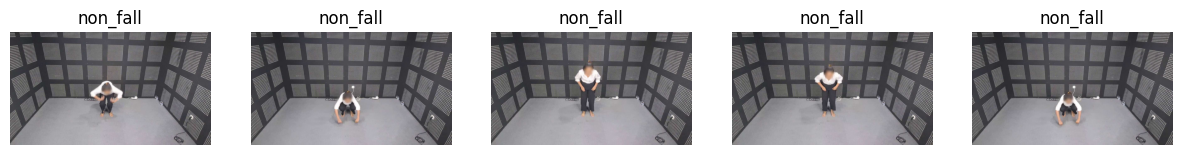

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# Load the CSV file with image paths and labels
df = pd.read_csv('image_labels.csv')

# Function to display images
def show_images(df, num_images=5):
    plt.figure(figsize=(15, 10))
    for i in range(num_images):
        img_path = df['filename'].iloc[i]
        label = df['label'].iloc[i]
        
        # Load the image
        img = Image.open(img_path)
        
        # Display the image
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(label)
        plt.axis('off')  # Hide axes
    plt.show()

# Show the first 5 images
show_images(df, num_images=5)

In [21]:
from sklearn.model_selection import train_test_split
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
import torch

# Define a custom dataset class
class CustomDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_path = self.dataframe['filename'].iloc[idx]
        label = self.dataframe['label'].iloc[idx]
        
        # Load the image
        img = Image.open(img_path).convert('RGB')
        
        if self.transform:
            img = self.transform(img)
        
        return img, label

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.ToTensor(),           # Convert images to tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize
])

# Split the dataset into training and validation sets
train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)

# Create dataset instances
train_dataset = CustomDataset(train_df, transform=transform)
val_dataset = CustomDataset(val_df, transform=transform)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [24]:
import certifi
print(certifi.where())

/Users/nasywaanaa/Library/Python/3.11/lib/python/site-packages/certifi/cacert.pem


In [30]:
import os
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from torchvision.models import resnet18


# Define a custom dataset class
class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        """
        Custom Dataset for image classification.

        Args:
            root_dir (str): Root directory of the dataset.
            transform (callable, optional): Transformations to apply to images.
        """
        self.root_dir = root_dir
        self.transform = transform
        self.data = []
        
        # Iterate through each class directory and collect file paths
        for label, class_name in enumerate(os.listdir(root_dir)):
            class_dir = os.path.join(root_dir, class_name)
            if os.path.isdir(class_dir):
                for subdir, _, files in os.walk(class_dir):
                    for file in files:
                        if file.endswith(('.jpg', '.png', '.jpeg')):  # Add more extensions if needed
                            self.data.append((os.path.join(subdir, file), label))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path, label = self.data[idx]
        img = Image.open(img_path).convert('RGB')
        
        if self.transform:
            img = self.transform(img)
        
        label_tensor = torch.tensor(label, dtype=torch.long)
        return img, label_tensor

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.ToTensor(),          # Convert images to tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize
])

# Define paths to train and validation datasets
train_dir = "./processed_split/train"
val_dir = "./processed_split/val"

# Create dataset instances
train_dataset = CustomDataset(train_dir, transform=transform)
val_dataset = CustomDataset(val_dir, transform=transform)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Load ResNet18 without pre-trained weights
model = resnet18(pretrained=False)

# Modify the final layer for binary classification
num_classes = 2  # Fall and Non-Fall
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Move the model to the appropriate device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Use CrossEntropyLoss for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

print("Dataset and model are ready for training.")


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Dataset and model are ready for training.


In [32]:
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()  # Set the model to training mode
        running_loss = 0.0
        
        print("test")
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)  # Move to device
            
            # Zero the parameter gradients
            optimizer.zero_grad()
            
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            # Backward pass and optimization
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            print("test")
        # Calculate average loss for the epoch
        epoch_loss = running_loss / len(train_loader)
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss : {epoch_loss:.4f}")

        # Validation phase
        model.eval()  # Set the model to evaluation mode
        correct = 0
        total = 0
        print("test")
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)  # Move to device
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        
        accuracy = 100 * correct / total
        print(f'Validation Accuracy: {accuracy:.2f}%')

# Train the model
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10)

test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
Epoch [1/10], Loss : 0.2083
test
Validation Accuracy: 96.39%
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test

In [33]:
from sklearn.metrics import classification_report

def evaluate_model(model, val_loader):
    model.eval()  # Set the model to evaluation mode
    all_labels = []
    all_predictions = []

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)  # Move to device
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

    # Generate a classification report
    print(classification_report(all_labels, all_predictions, target_names=['non_fall', 'fall']))

# Evaluate the model
evaluate_model(model, val_loader)

              precision    recall  f1-score   support

    non_fall       1.00      1.00      1.00       309
        fall       1.00      1.00      1.00       550

    accuracy                           1.00       859
   macro avg       1.00      1.00      1.00       859
weighted avg       1.00      1.00      1.00       859



In [34]:
# Save the trained model
torch.save(model.state_dict(), 'fall_non_fall_model.pth')
print("Model saved as fall_non_fall_model.pth")

Model saved as fall_non_fall_model.pth


In [46]:
# # Load the model for inference
# model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
# model.fc = nn.Linear(model.fc.in_features, num_classes)
# model.load_state_dict(torch.load('fall_non_fall_model.pth'))
# model.eval()  # Set the model to evaluation mode

In [37]:
import os
import pandas as pd

# Step 1: Define the directory containing the images
image_directory = 'test'  # Update this path as needed

# Step 2: Collect image paths
image_data = []

# Loop through the directory to get all image file paths
for img_name in os.listdir(image_directory):
    if img_name.endswith(('.jpg', '.jpeg', '.png')):  # Check for image files
        img_path = os.path.join(image_directory, img_name)
        image_data.append({'filename': img_path})

# Step 3: Create a DataFrame
image_df = pd.DataFrame(image_data)

# Display the DataFrame
print(image_df.head())  # Show the first few rows of the DataFrame

              filename
0  test/3ade5073cd.jpg
1  test/763219a27c.jpg
2  test/7bf106744f.jpg
3  test/50ef0bbe1f.jpg
4  test/553167e52c.jpg


In [38]:
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image

# Define transformations (same as used during training)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.ToTensor(),           # Convert images to tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize
])

# Define a custom dataset class for the new images
class ImageDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_path = self.dataframe['filename'].iloc[idx]
        img = Image.open(img_path).convert('RGB')  # Load the image
        if self.transform:
            img = self.transform(img)
        return img

# Create a dataset instance
image_dataset = ImageDataset(image_df, transform=transform)

# Create a DataLoader for the new dataset
image_loader = DataLoader(image_dataset, batch_size=32, shuffle=False)

In [39]:
def predict_on_new_data(model, image_loader):
    model.eval()  # Set the model to evaluation mode
    all_predictions = []

    with torch.no_grad():
        for images in image_loader:
            images = images.to(device)  # Move to device
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            all_predictions.extend(predicted.cpu().numpy())
            print("test for")
        print("test while")
    return all_predictions

# Make predictions on the new dataset
predictions = predict_on_new_data(model, image_loader)

# Add predictions to the DataFrame
image_df['predicted_label'] = predictions

# Display the DataFrame with predictions
print(image_df.head())

test for
test for
test for
test for
test for
test for
test for
test for
test for
test for
test for
test for
test for
test for
test for
test for
test for
test for
test for
test for
test for
test for
test for
test for
test for
test for
test for
test for
test for
test for
test for
test for
test for
test for
test for
test for
test for
test for
test for
test for
test for
test for
test for
test for
test for
test for
test for
test for
test for
test for
test for
test for
test for
test for
test for
test for
test for
test for
test for
test for
test for
test for
test for
test for
test for
test for
test for
test for
test while
              filename  predicted_label
0  test/3ade5073cd.jpg                1
1  test/763219a27c.jpg                0
2  test/7bf106744f.jpg                1
3  test/50ef0bbe1f.jpg                1
4  test/553167e52c.jpg                1


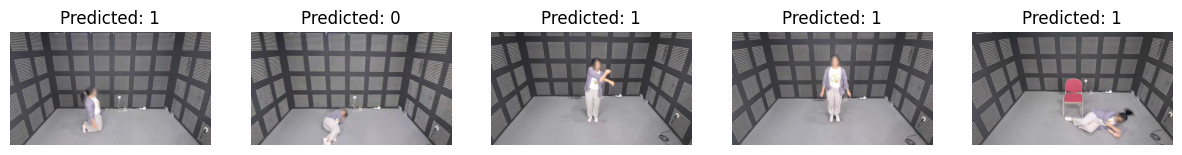

In [40]:
import matplotlib.pyplot as plt

def visualize_predictions(image_df, num_images=5):
    plt.figure(figsize=(15, 10))
    for i in range(num_images):
        img_path = image_df['filename'].iloc[i]
        img = Image.open(img_path).convert('RGB')
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'Predicted: {image_df["predicted_label"].iloc[i]}')
    plt.show()

# Visualize predictions
visualize_predictions(image_df, num_images=5)

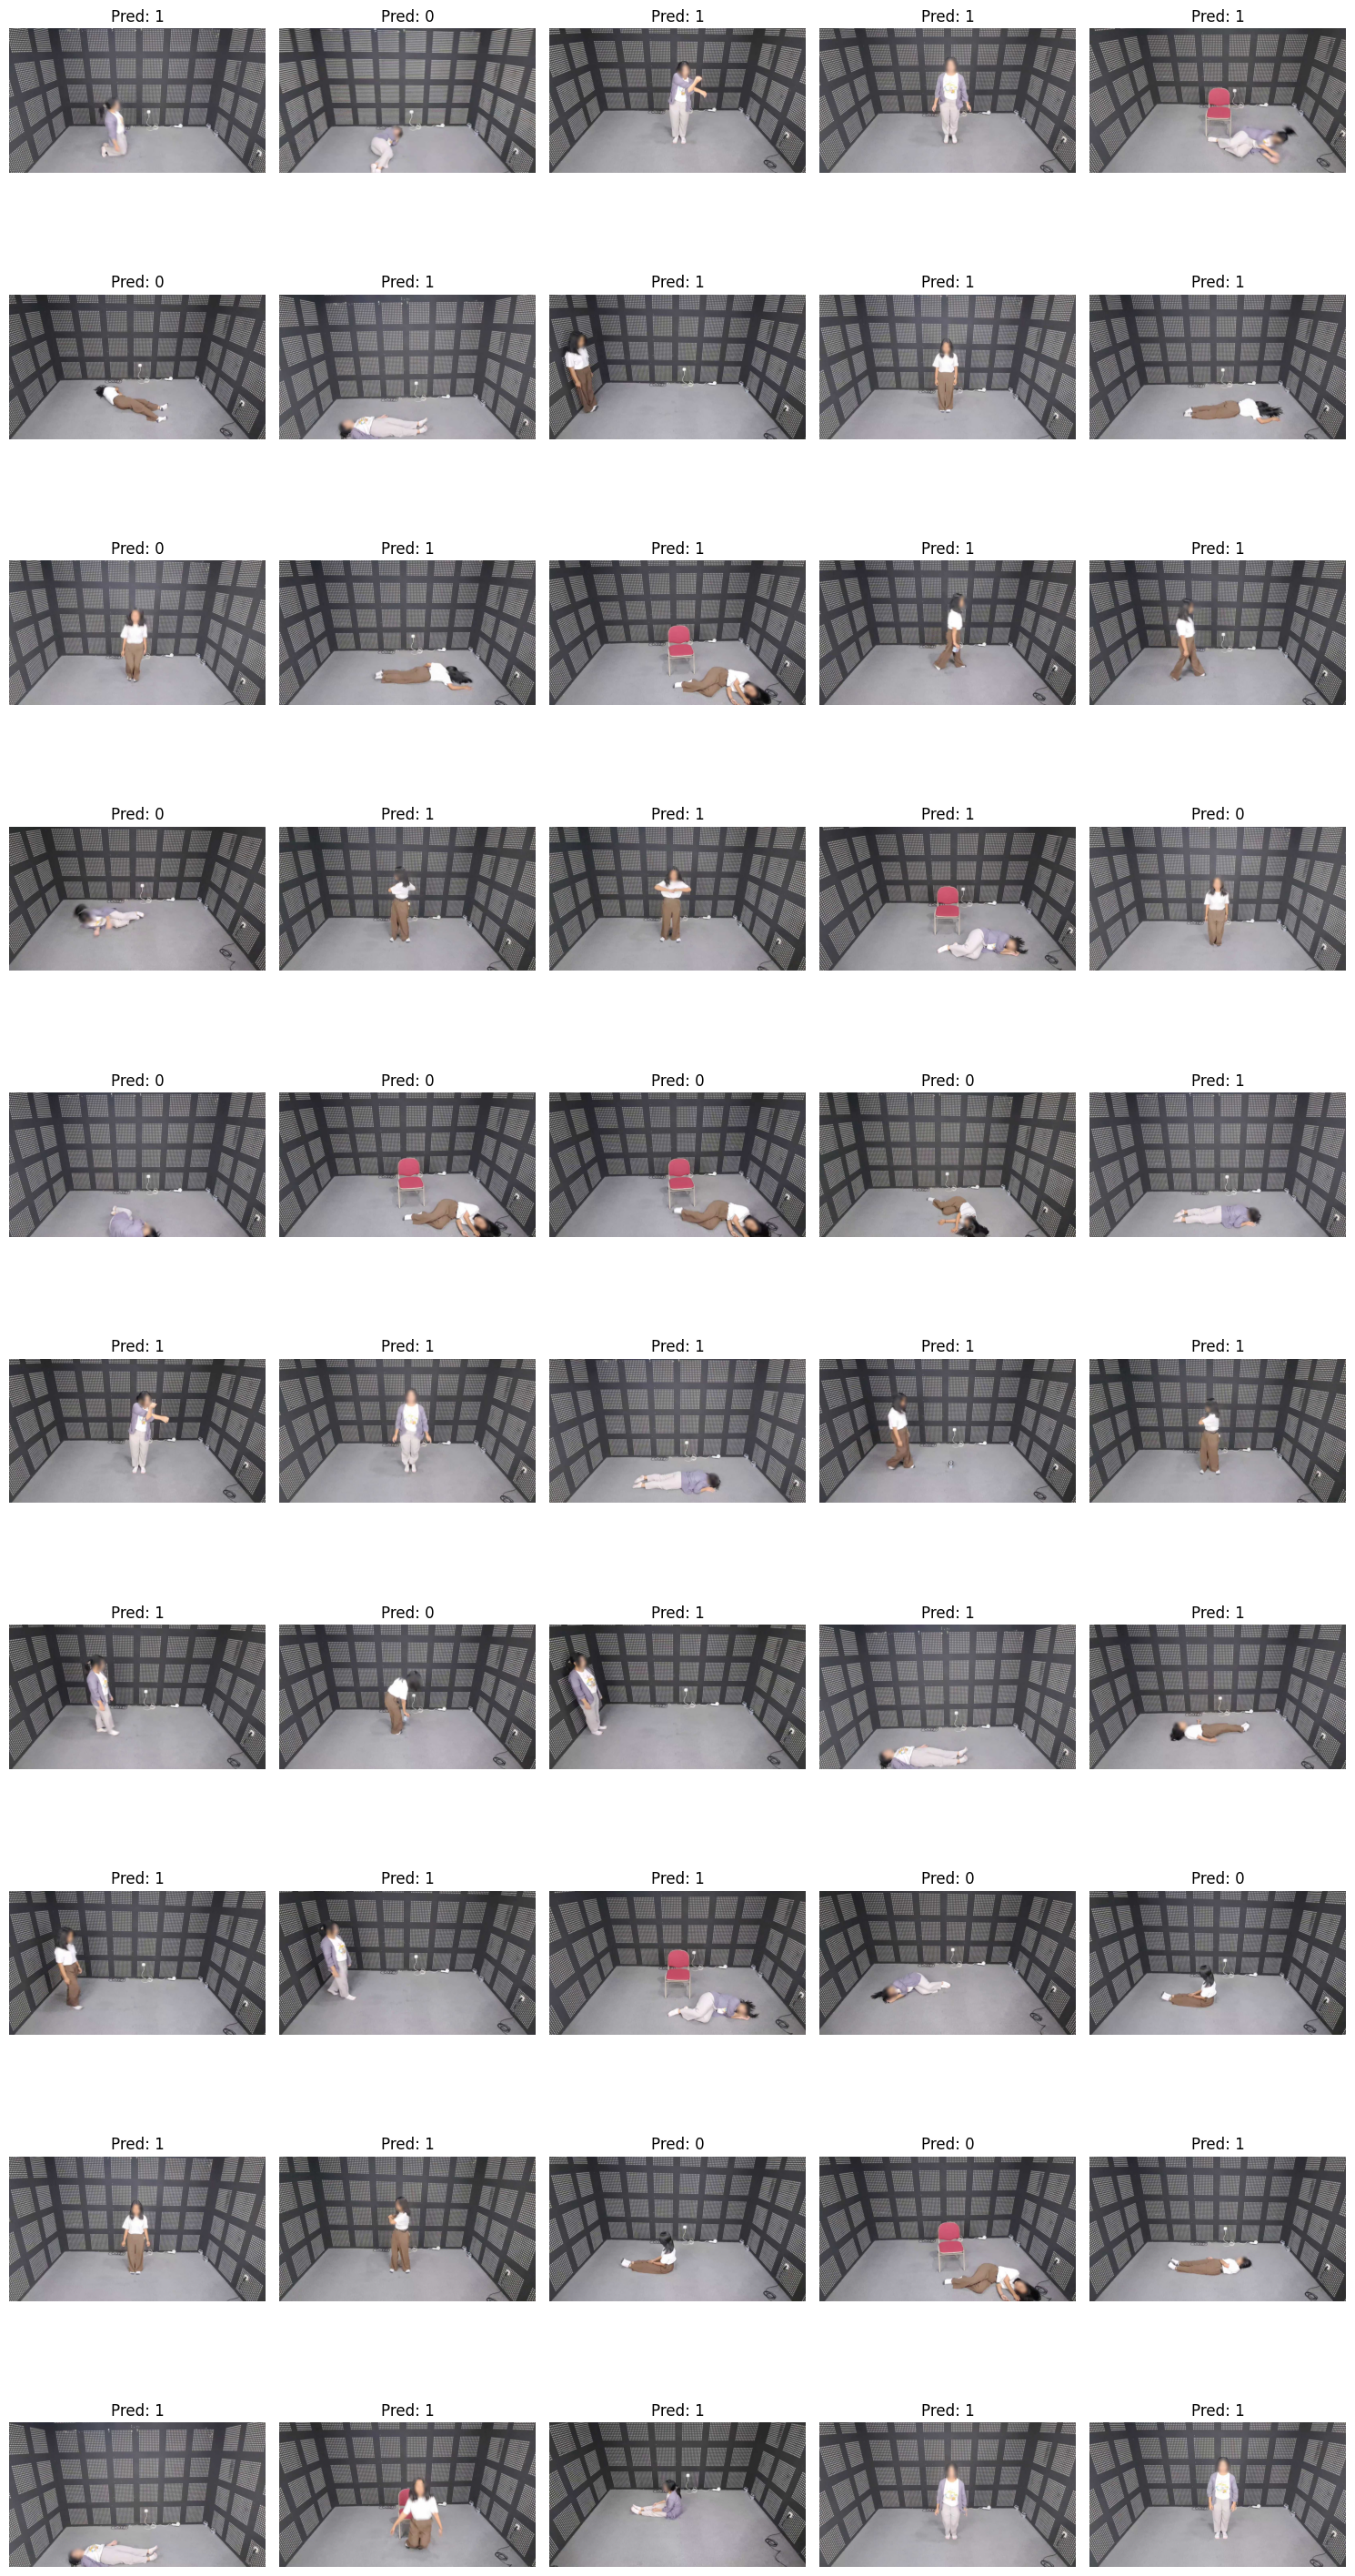

In [41]:
import matplotlib.pyplot as plt

def visualize_predictions(image_df, max_images=50, num_images_per_row=5):
    # Limit the number of images to visualize
    num_images = min(max_images, len(image_df))
    num_rows = (num_images + num_images_per_row - 1) // num_images_per_row  # Calculate number of rows needed

    plt.figure(figsize=(15, 3 * num_rows))  # Adjust figure size based on number of rows
    for i in range(num_images):
        img_path = image_df['filename'].iloc[i]
        img = Image.open(img_path).convert('RGB')
        plt.subplot(num_rows, num_images_per_row, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'Pred: {image_df["predicted_label"].iloc[i]}')
    
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

# Visualize a subset of predictions (e.g., first 50 images)
visualize_predictions(image_df, max_images=50, num_images_per_row=5)

In [42]:
import os
import pandas as pd

# Create a new DataFrame with 'id' and 'label'
predictions_df = pd.DataFrame({
    'id': [os.path.basename(filename) for filename in image_df['filename']],
    'label': image_df['predicted_label']
})

# Save the predictions to a CSV file
predictions_df.to_csv('predictions.csv', index=False)
print("Predictions saved to predictions.csv")

Predictions saved to predictions.csv
